In [7]:
import pandas as pd
import numpy as np

In [47]:
#Test battle_results_with_weakness

battle_results_with_weakness = catalog.load("battle_results_with_weakness")

2020-05-30 20:58:00,549 - kedro.io.data_catalog - INFO - Loading data from `battle_results_with_weakness` (CSVDataSet)...


/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func()


In [5]:
battle_results_with_weakness.keys()

Index(['Name_1', 'Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Name_2', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2', 'WeatherAndTime', 'BattleResult', 'ID_1',
       'Type_1_1', 'Type_2_1', 'ID_2', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
       'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
       'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
       'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
       'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
       'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
       'WeatherAndTime_d', 'WeatherAndTime_e', 'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2b

In [43]:
import logging
from typing import Dict, List

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split


def split_data(data: pd.DataFrame, parameters: Dict) -> List:
    """Splits data into training and test sets.

        Args:
            data: Source data.
            parameters: Parameters defined in parameters.yml.

        Returns:
            A list containing split data.

    """
    X = data[
        [   'Level_1', 
            #'Price_1', 
            'HP_1', 
            'Attack_1', 
            'Defense_1',
            'Sp_Atk_1', 
            'Sp_Def_1', 
            'Speed_1', 
            'Legendary_1',
         
            'A1/D2',
            'A2/D1',
            'Sp_A1/Sp_D2',
            'Sp_A2/Sp_D1',
         
            'Eff_11',
            'Eff_12',
            'Eff_21',
            'Eff_22',
            'Eff',

            'Level_2',
            #'Price_2', 
            'HP_2', 
            'Attack_2', 
            'Defense_2', 
            'Sp_Atk_2', 
            'Sp_Def_2',
            'Speed_2', 
            'Legendary_2', 
         
            'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
            'WeatherAndTime_d', 'WeatherAndTime_e',
         
            'Type_1_1_a', 'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 
            'Type_1_2_a', 'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 
            'Type_2_1_a', 'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 
            'Type_2_2_a', 'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
         #0,1,2,3,4,
         # 'WeatherAndTime',
        ]
    ].values
    y = data["BattleResult"].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=parameters["test_size"], random_state=parameters["random_state"]
    )

    return [X_train, X_test, y_train, y_test]


def train_model(X_train: np.ndarray, y_train: np.ndarray) -> LinearRegression:
    """Train the linear regression model.

        Args:
            X_train: Training data of independent features.
            y_train: Training data for price.

        Returns:
            Trained model.

    """
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor


def evaluate_model(regressor: LinearRegression, X_test: np.ndarray, y_test: np.ndarray):
    """Calculate the coefficient of determination and log the result.

        Args:
            regressor: Trained model.
            X_test: Testing data of independent features.
            y_test: Testing data for price.

    """
    y_pred = regressor.predict(X_test)
    print(y_pred, y_test, sum((y_pred-y_test)**2)/len(y_test))
    score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test,y_pred) 
    
    logger = logging.getLogger(__name__)
    logger.info("Model has a coefficient R^2 of %.3f.", score)
    logger.info("and a Mean Squared Error of %.3f.", MSE )
#     plt.scatter(X_test, y_test)

    #Plot for actual and prediction
    a = plt.axes(aspect='equal')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actuals [BattleResult]')
    plt.ylabel('Predictions [BattleResult]')
    lims = [-2500,2500]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, c="orange")
    plt.show()

#     plt.scatter(y_test, y_pred)#, color='red')
#     plt.show()

In [40]:
params = dict({'test_size': 0.2, 'random_state': 3})

X_train, X_test, y_train, y_test = split_data(battle_results_with_weakness, params)

In [41]:
regressor = train_model(X_train, y_train)

In [42]:
evaluate_model(regressor, X_test, y_test)

[ 154.00194036  -84.81605043 -209.50868495 ...  121.66232666  824.25864805
  372.79787133] [ 170  -60 -249 ...  147  647  584] [  255.93791238   615.83635908  1559.56396437 ...   641.99769012
 31420.62830769 44606.33915684]
2020-05-30 19:38:38,591 - __main__ - INFO - Model has a coefficient R^2 of 0.897.


In [1]:
# Now for the Data with differences and ratios

battle_results_diff_ratio = catalog.load("battle_results_diff_ratio")

2020-05-30 21:05:22,507 - kedro.io.data_catalog - INFO - Loading data from `battle_results_diff_ratio` (CSVDataSet)...


/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func()


In [12]:
battle_results_diff_ratio.keys()

Index(['Name_1', 'Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Name_2', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2', 'WeatherAndTime', 'BattleResult', 'ID_1',
       'Type_1_1', 'Type_2_1', 'ID_2', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
       'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
       'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
       'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
       'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
       'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
       'WeatherAndTime_d', 'WeatherAndTime_e', 'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2b

In [53]:
from sklearn import preprocessing

In [75]:
# Choose Values in Dataset which should be scaled
x = battle_results_diff_ratio[['Level_1', 'Price_1']].values

In [76]:
print(x)

[[  30  441]
 [  15  297]
 [  97 2007]
 ...
 [  28  975]
 [  66 2551]
 [  46 1590]]


In [77]:
# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)

[[0.29591837 0.03109594]
 [0.14285714 0.01289344]
 [0.97959184 0.22904816]
 ...
 [0.2755102  0.09859689]
 [0.66326531 0.29781317]
 [0.45918367 0.17633675]]


/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
min_max_scaler.fit_transform(battle_results_diff_ratio[['Level_1', 'Price_1']].values)

/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.29591837, 0.03109594],
       [0.14285714, 0.01289344],
       [0.97959184, 0.22904816],
       ...,
       [0.2755102 , 0.09859689],
       [0.66326531, 0.29781317],
       [0.45918367, 0.17633675]])

In [86]:
battle_results_diff_ratio.keys()

Index(['Name_1', 'Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Name_2', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2', 'WeatherAndTime', 'BattleResult', 'ID_1',
       'Type_1_1', 'Type_2_1', 'ID_2', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
       'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
       'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
       'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
       'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
       'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
       'WeatherAndTime_d', 'WeatherAndTime_e', 'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2b

In [91]:
column_maxes = battle_results_diff_ratio[['Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2',
#        'Type_1_1', 'Type_2_1', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
#        'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
#        'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
#        'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
#        'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
#        'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
#        'WeatherAndTime_d', 'WeatherAndTime_e', '
       'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2ba', 'Eff_22', 'Eff', 'Level Diff',
       'Level Ratio', 'Price Diff', 'Price Ratio', 'HP Diff', 'HP Ratio',
       'Attack Diff', 'Attack Ratio', 'Defense Diff', 'Defense Ratio',
       'Sp_Atk Diff', 'Sp_Atk Ratio', 'Sp_Def Diff', 'Sp_Def Ratio',
       'Speed Diff', 'Speed Ratio', 'A/D Diff', 'A/D Ratio', 'Sp_A/Sp_D Diff',
       'Sp_A/Sp_D Ratio', 'Legendary Diff', 'Eff_11 Diff', 'Eff_12 Diff',
       'Eff_21 Diff', 'Eff_22 Diff', 'Eff Diff']].max()
df_max = column_maxes.max()
column_mins = battle_results_diff_ratio[['Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2',
#        'Type_1_1', 'Type_2_1', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
#        'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
#        'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
#        'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
#        'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
#        'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
#        'WeatherAndTime_d', 'WeatherAndTime_e', '
       'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2ba', 'Eff_22', 'Eff', 'Level Diff',
       'Level Ratio', 'Price Diff', 'Price Ratio', 'HP Diff', 'HP Ratio',
       'Attack Diff', 'Attack Ratio', 'Defense Diff', 'Defense Ratio',
       'Sp_Atk Diff', 'Sp_Atk Ratio', 'Sp_Def Diff', 'Sp_Def Ratio',
       'Speed Diff', 'Speed Ratio', 'A/D Diff', 'A/D Ratio', 'Sp_A/Sp_D Diff',
       'Sp_A/Sp_D Ratio', 'Legendary Diff', 'Eff_11 Diff', 'Eff_12 Diff',
       'Eff_21 Diff', 'Eff_22 Diff', 'Eff Diff']].min()
df_min = column_mins.min()

battle_results_diff_ratio[['Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2',
#        'Type_1_1', 'Type_2_1', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
#        'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
#        'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
#        'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
#        'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
#        'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
#        'WeatherAndTime_d', 'WeatherAndTime_e', '
       'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2ba', 'Eff_22', 'Eff', 'Level Diff',
       'Level Ratio', 'Price Diff', 'Price Ratio', 'HP Diff', 'HP Ratio',
       'Attack Diff', 'Attack Ratio', 'Defense Diff', 'Defense Ratio',
       'Sp_Atk Diff', 'Sp_Atk Ratio', 'Sp_Def Diff', 'Sp_Def Ratio',
       'Speed Diff', 'Speed Ratio', 'A/D Diff', 'A/D Ratio', 'Sp_A/Sp_D Diff',
       'Sp_A/Sp_D Ratio', 'Legendary Diff', 'Eff_11 Diff', 'Eff_12 Diff',
       'Eff_21 Diff', 'Eff_22 Diff', 'Eff Diff']]\
= (battle_results_diff_ratio[['Level_1', 'Price_1', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp_Atk_1', 'Sp_Def_1', 'Speed_1', 'Legendary_1', 'Level_2',
       'Price_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp_Atk_2', 'Sp_Def_2',
       'Speed_2', 'Legendary_2',
#        'Type_1_1', 'Type_2_1', 'Type_1_2', 'Type_2_2', 'Type_1_1_a',
#        'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 'Type_1_2_a',
#        'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 'Type_2_1_a',
#        'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 'Type_2_2_a',
#        'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
#        'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
#        'WeatherAndTime_d', 'WeatherAndTime_e', '
       'A1/D2', 'A2/D1', 'Sp_A1/Sp_D2',
       'Sp_A2/Sp_D1', 'value_1_1ab', 'value_1_1ba', 'Eff_11', 'value_1_2ab',
       'value_2_1ba', 'Eff_12', 'value_2_1ab', 'value_1_2ba', 'Eff_21',
       'value_2_2ab', 'value_2_2ba', 'Eff_22', 'Eff', 'Level Diff',
       'Level Ratio', 'Price Diff', 'Price Ratio', 'HP Diff', 'HP Ratio',
       'Attack Diff', 'Attack Ratio', 'Defense Diff', 'Defense Ratio',
       'Sp_Atk Diff', 'Sp_Atk Ratio', 'Sp_Def Diff', 'Sp_Def Ratio',
       'Speed Diff', 'Speed Ratio', 'A/D Diff', 'A/D Ratio', 'Sp_A/Sp_D Diff',
       'Sp_A/Sp_D Ratio', 'Legendary Diff', 'Eff_11 Diff', 'Eff_12 Diff',
       'Eff_21 Diff', 'Eff_22 Diff', 'Eff Diff']] - df_min) / (df_max - df_min)

In [88]:
print(column_maxes, df_max, df_min)
print(normalized_df)

Level_1           99.000000
Price_1         8106.000000
HP_1            2312.000000
Attack_1        1865.000000
Defense_1       2336.000000
                   ...     
Eff_11 Diff       83.321333
Eff_12 Diff       83.321333
Eff_21 Diff       33.303333
Eff_22 Diff        9.900000
Eff Diff       83333.333321
Length: 61, dtype: float64 116986.88 -83333.33332133332
          Level_1   Price_1      HP_1  Attack_1  Defense_1  Sp_Atk_1  \
0        0.416150  0.418202  0.416749  0.416180   0.416515  0.416235   
1        0.416076  0.417483  0.416460  0.416130   0.416365  0.416165   
2        0.416485  0.426020  0.419460  0.416804   0.418312  0.417089   
3        0.416310  0.420404  0.417513  0.416350   0.417024  0.416480   
4        0.416425  0.423728  0.418671  0.416620   0.417783  0.416839   
...           ...       ...       ...       ...        ...       ...   
2719158  0.416026  0.418751  0.416340  0.416390   0.416450  0.416525   
2719159  0.416220  0.423838  0.417149  0.417069   0.417244  

In [144]:
import logging
from typing import Dict, List

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def split_data(data: pd.DataFrame, parameters: Dict) -> List:
    """Splits data into training and test sets.

        Args:
            data: Source data.
            parameters: Parameters defined in parameters.yml.

        Returns:
            A list containing split data.

    """
    X = data[
         [
            'Level_1', 
            'Price_1', 
            'HP_1', 
            'Attack_1', 
            'Defense_1',
            'Sp_Atk_1', 
            'Sp_Def_1', 
            'Speed_1', 
            'Legendary_1',
         
            'A1/D2',
            'A2/D1',
            'Sp_A1/Sp_D2',
            'Sp_A2/Sp_D1',
             
            'value_1_1ab', 'value_1_1ba', 
            'value_1_2ab', 'value_2_1ba', 
            'value_2_1ab', 'value_1_2ba',
            'value_2_2ab', 'value_2_2ba',
         
            'Eff_11',
            'Eff_12',
            'Eff_21',
            'Eff_22',
            'Eff',

            'Level_2',
            'Price_2', 
            'HP_2', 
            'Attack_2', 
            'Defense_2', 
            'Sp_Atk_2', 
            'Sp_Def_2',
            'Speed_2', 
            'Legendary_2', 
         
            'WeatherAndTime_a', 'WeatherAndTime_b', 'WeatherAndTime_c',
            'WeatherAndTime_d', 'WeatherAndTime_e',
         
            'Type_1_1_a', 'Type_1_1_b', 'Type_1_1_c', 'Type_1_1_d', 'Type_1_1_e', 
            'Type_1_2_a', 'Type_1_2_b', 'Type_1_2_c', 'Type_1_2_d', 'Type_1_2_e', 
            'Type_2_1_a', 'Type_2_1_b', 'Type_2_1_c', 'Type_2_1_d', 'Type_2_1_e', 
            'Type_2_2_a', 'Type_2_2_b', 'Type_2_2_c', 'Type_2_2_d', 'Type_2_2_e',
         
         
            'Level Diff',
            'Level Ratio', 
            'Price Diff', 
            'Price Ratio', 
            'HP Diff', 
            'HP Ratio',
            'Attack Diff', 
            'Attack Ratio', 
            'Defense Diff', 
            'Defense Ratio',
            'Sp_Atk Diff', 
            'Sp_Atk Ratio', 
            'Sp_Def Diff', 
            'Sp_Def Ratio',
            'Speed Diff', 
            'Speed Ratio', 
            'A/D Diff', 
            'A/D Ratio', 
            'Sp_A/Sp_D Diff',
            'Sp_A/Sp_D Ratio', 
            'Legendary Diff', 
            'Eff_11 Diff', 
            'Eff_12 Diff',
            'Eff_21 Diff', 
            'Eff_22 Diff', 
            'Eff Diff'
         #0,1,2,3,4,
         # 'WeatherAndTime',
        ]
    ].values
    y = data["BattleResult"].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=parameters["test_size"], random_state=parameters["random_state"]
    )

    return [X_train, X_test, y_train, y_test]

In [148]:
params = dict({'test_size': 0.2, 'random_state': 42})

X_train_diff, X_test_diff, y_train_diff, y_test_diff = split_data(battle_results_diff_ratio, params)

In [149]:
regressor = train_model(X_train_diff, y_train_diff)

[  130.640625  -200.015625  -356.890625 ... -1114.015625  -151.3125
   -99.265625] [  243  -255  -460 ... -1126  -164  -175] 21705.179346166507
2020-05-30 23:58:44,634 - __main__ - INFO - Model has a coefficient R^2 of 0.907.
2020-05-30 23:58:44,637 - __main__ - INFO - and a Mean Squared Error of 21705.179.


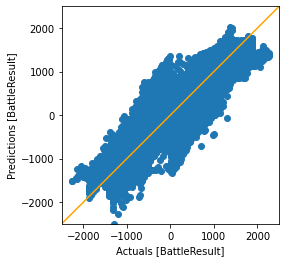

In [150]:
evaluate_model(regressor, X_test_diff, y_test_diff)

In [123]:
print(y_pred)

NameError: name 'y_pred' is not defined

In [40]:
print(np.shape(X_test_diff[:,0]), np.shape(y_test_diff) )

(543833,) (543833,)


In [38]:
X_test_diff[:][0]

array([ 5.60000000e+01,  1.70000000e+02,  3.03000000e+02,  1.70000000e+02,
        1.31000000e+02,  1.31000000e+02,  2.73000000e+02,  0.00000000e+00,
        4.09459459e+00,  5.29411765e-01,  1.48863636e+00,  7.86259542e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.50000000e+01,  8.60000000e+01,  9.00000000e+01,
        7.40000000e+01,  1.03000000e+02,  8.80000000e+01,  1.09000000e+02,
        0.00000000e+00, -1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
       -1.00000000e+00, -2.00000000e+00,  2.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
       -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        0.00000000e+00, -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.10000000e+01,  2.24000000e+00,
        6.28000000e+02,  

In [151]:
from sklearn.neural_network import MLPRegressor

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=1)
#X_train_diff, X_test_diff, y_train_diff, y_test_diff

In [160]:
regr = MLPRegressor(random_state=1, max_iter=500, verbose=True).fit(X_train_diff, y_train_diff)

Iteration 1, loss = 115019.03930005
Iteration 2, loss = 104587.31129399
Iteration 3, loss = 79325.41806951
Iteration 4, loss = 48469.55681343
Iteration 5, loss = 26071.80365497
Iteration 6, loss = 17648.88479394
Iteration 7, loss = 15973.75872720
Iteration 8, loss = 15512.40018357
Iteration 9, loss = 15241.47595750
Iteration 10, loss = 15019.22172068
Iteration 11, loss = 14893.20600699
Iteration 12, loss = 14815.45120807
Iteration 13, loss = 14743.79112145
Iteration 14, loss = 14644.37152944
Iteration 15, loss = 14557.60022758
Iteration 16, loss = 14486.51416565
Iteration 17, loss = 14417.56856814
Iteration 18, loss = 14369.05448276
Iteration 19, loss = 14276.36465781
Iteration 20, loss = 14201.06409138
Iteration 21, loss = 14162.58124496
Iteration 22, loss = 14098.10524525
Iteration 23, loss = 14038.53670655
Iteration 24, loss = 13990.14031178
Iteration 25, loss = 13950.51480776
Iteration 26, loss = 13921.07703935
Iteration 27, loss = 13877.34211750
Iteration 28, loss = 13816.40136526

Iteration 226, loss = 10409.05165466
Iteration 227, loss = 10399.58050908
Iteration 228, loss = 10396.14533992
Iteration 229, loss = 10386.10136105
Iteration 230, loss = 10380.53416082
Iteration 231, loss = 10372.48103401
Iteration 232, loss = 10368.78052461
Iteration 233, loss = 10366.19163522
Iteration 234, loss = 10354.45726188
Iteration 235, loss = 10353.32005275
Iteration 236, loss = 10341.90652008
Iteration 237, loss = 10330.63129885
Iteration 238, loss = 10325.09117914
Iteration 239, loss = 10320.70023043
Iteration 240, loss = 10312.71360609
Iteration 241, loss = 10299.68736684
Iteration 242, loss = 10297.92294650
Iteration 243, loss = 10291.98065536
Iteration 244, loss = 10286.31231631
Iteration 245, loss = 10275.48993951
Iteration 246, loss = 10271.13502699
Iteration 247, loss = 10272.00781833
Iteration 248, loss = 10257.29923165
Iteration 249, loss = 10253.38788554
Iteration 250, loss = 10242.91341039
Iteration 251, loss = 10237.22750116
Iteration 252, loss = 10230.54580895
I

Iteration 452, loss = 9235.20190233
Iteration 453, loss = 9225.51242448
Iteration 454, loss = 9216.87144341
Iteration 455, loss = 9218.11735547
Iteration 456, loss = 9219.24493048
Iteration 457, loss = 9213.15420010
Iteration 458, loss = 9210.30421649
Iteration 459, loss = 9204.06781388
Iteration 460, loss = 9201.69460318
Iteration 461, loss = 9198.89625632
Iteration 462, loss = 9192.28918027
Iteration 463, loss = 9196.92407758
Iteration 464, loss = 9189.15832514
Iteration 465, loss = 9186.11564981
Iteration 466, loss = 9178.67724062
Iteration 467, loss = 9180.52894175
Iteration 468, loss = 9169.08651821
Iteration 469, loss = 9167.46091046
Iteration 470, loss = 9173.57701415
Iteration 471, loss = 9160.49262325
Iteration 472, loss = 9159.07707338
Iteration 473, loss = 9161.01977590
Iteration 474, loss = 9149.57523054
Iteration 475, loss = 9147.76293395
Iteration 476, loss = 9149.65355561
Iteration 477, loss = 9143.96952005
Iteration 478, loss = 9149.16625303
Iteration 479, loss = 9132.9

/Users/lucazurmuehle/anaconda3/envs/pokehack/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [162]:
y_pred_diff = regr.predict(X_test_diff)#[:2])

In [161]:
regr.score(X_test_diff, y_test_diff)

0.9231958744480443

In [163]:
r2_score(y_test_diff, y_pred_diff)

0.9231958744480443

In [164]:
mean_squared_error(y_test_diff,y_pred_diff) 

18006.69301960508

In [167]:
import pickle

In [168]:
filename = 'MLPregressor.sav'
pickle.dump(regr, open(filename, 'wb'))

In [157]:
X_test_diff[:2]

array([[ 0.41627019,  0.42697805,  0.41808229,  0.41799742,  0.41799742,
         0.41748824,  0.41792754,  0.41748824,  0.41600062,  0.41600456,
         0.41600634,  0.41600992,  0.41600269,  0.41603057,  0.41600561,
         0.41603057,  0.41600561,  0.41600561,  0.41600561,  0.41603057,
         0.41600362,  0.41603057,  0.41603057,  0.41600561,  0.41605054,
         0.41779774,  0.41637502,  0.42529574,  0.41822207,  0.41828696,
         0.41853157,  0.41679934,  0.41679934,  0.41665957,  0.41600062,
        -1.        , -2.        ,  0.        ,  1.        , -3.        ,
         2.        ,  0.        ,  0.        ,  0.        , -1.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  1.        ,
        -1.        , -2.        , -2.        , -1.        , -2.        ,
         0.        , -1.        , -1.        ,  1.        ,  1.        ,
         0.41589579,  0.41600422,  0.41768293,  0.41600652,  0.41586085,
         0.4160053 ,  0.41571109,  0.41600498,  0.4

In [165]:
print(regr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)
